In [41]:
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from warnings import filterwarnings
filterwarnings('ignore')

In [42]:
df=pd.read_csv('rideshare_kaggle.csv')

In [43]:
df.head()

id     timestamp  hour  day  month  \
0  424553bb-7174-41ea-aeb4-fe06d4f4b9d7  1.544953e+09     9   16     12   
1  4bd23055-6827-41c6-b23b-3c491f24e74d  1.543284e+09     2   27     11   
2  981a3613-77af-4620-a42a-0c0866077d1e  1.543367e+09     1   28     11   
3  c2d88af2-d278-4bfd-a8d0-29ca77cc5512  1.543554e+09     4   30     11   
4  e0126e1f-8ca9-4f2e-82b3-50505a09db9a  1.543463e+09     3   29     11   

              datetime          timezone            source    destination  \
0  2018-12-16 09:30:07  America/New_York  Haymarket Square  North Station   
1  2018-11-27 02:00:23  America/New_York  Haymarket Square  North Station   
2  2018-11-28 01:00:22  America/New_York  Haymarket Square  North Station   
3  2018-11-30 04:53:02  America/New_York  Haymarket Square  North Station   
4  2018-11-29 03:49:20  America/New_York  Haymarket Square  North Station   

  cab_type  ... precipIntensityMax uvIndexTime  temperatureMin  \
0     Lyft  ...             0.1276  1544979600           39.89   
1     Lyft  ...             0.1300  1543251600           40.49   
2     Lyft  ...             0.1064  1543338000           35.36   
3     Lyft  ...             0.0000  1543507200           34.67   
4     Lyft  ...             0.0001  1543420800           33.10   

   temperatureMinTime  temperatureMax  temperatureMaxTime  \
0          1545012000           43.68          1544968800   
1          1543233600           47.30          1543251600   
2          1543377600           47.55          1543320000   
3          1543550400           45.03          1543510800   
4          1543402800           42.18          1543420800   

   apparentTemperatureMin  apparentTemperatureMinTime  apparentTemperatureMax  \
0                   33.73                  1545012000                   38.07   
1                   36.20                  1543291200                   43.92   
2                   31.04                  1543377600                   44.12   
3                   30.30                  1543550400                   38.53   
4                   29.11                  1543392000                   35.75   

  apparentTemperatureMaxTime  
0                 1544958000  
1                 1543251600  
2                 1543320000  
3                 1543510800  
4                 1543420800  

[5 rows x 57 columns]

In [44]:
df.shape

(693071, 57)

In [45]:
df=df.drop(['id'],axis=1)

In [46]:
df.head()

timestamp  hour  day  month             datetime          timezone  \
0  1.544953e+09     9   16     12  2018-12-16 09:30:07  America/New_York   
1  1.543284e+09     2   27     11  2018-11-27 02:00:23  America/New_York   
2  1.543367e+09     1   28     11  2018-11-28 01:00:22  America/New_York   
3  1.543554e+09     4   30     11  2018-11-30 04:53:02  America/New_York   
4  1.543463e+09     3   29     11  2018-11-29 03:49:20  America/New_York   

             source    destination cab_type    product_id  ...  \
0  Haymarket Square  North Station     Lyft     lyft_line  ...   
1  Haymarket Square  North Station     Lyft  lyft_premier  ...   
2  Haymarket Square  North Station     Lyft          lyft  ...   
3  Haymarket Square  North Station     Lyft   lyft_luxsuv  ...   
4  Haymarket Square  North Station     Lyft     lyft_plus  ...   

  precipIntensityMax  uvIndexTime  temperatureMin  temperatureMinTime  \
0             0.1276   1544979600           39.89          1545012000   
1             0.1300   1543251600           40.49          1543233600   
2             0.1064   1543338000           35.36          1543377600   
3             0.0000   1543507200           34.67          1543550400   
4             0.0001   1543420800           33.10          1543402800   

   temperatureMax  temperatureMaxTime  apparentTemperatureMin  \
0           43.68          1544968800                   33.73   
1           47.30          1543251600                   36.20   
2           47.55          1543320000                   31.04   
3           45.03          1543510800                   30.30   
4           42.18          1543420800                   29.11   

   apparentTemperatureMinTime apparentTemperatureMax  \
0                  1545012000                  38.07   
1                  1543291200                  43.92   
2                  1543377600                  44.12   
3                  1543550400                  38.53   
4                  1543392000                  35.75   

  apparentTemperatureMaxTime  
0                 1544958000  
1                 1543251600  
2                 1543320000  
3                 1543510800  
4                 1543420800  

[5 rows x 56 columns]

In [47]:
df=df.drop(['timestamp','datetime','windGustTime','temperatureHigh','temperatureHighTime','temperatureLow','temperatureLowTime',
           'apparentTemperatureHigh','apparentTemperatureHighTime','apparentTemperatureLow','apparentTemperatureLowTime',
            'sunriseTime','sunsetTime','precipIntensityMax','uvIndexTime','temperatureMin','temperatureMinTime','temperatureMax',
            'temperatureMaxTime','apparentTemperature','apparentTemperatureMin','apparentTemperatureMinTime','apparentTemperatureMax'
           ,'apparentTemperatureMaxTime','long_summary','icon','product_id','timezone','visibility.1','destination'],axis=1)

In [48]:
df.head()

hour  day  month            source cab_type          name  price  distance  \
0     9   16     12  Haymarket Square     Lyft        Shared    5.0      0.44   
1     2   27     11  Haymarket Square     Lyft           Lux   11.0      0.44   
2     1   28     11  Haymarket Square     Lyft          Lyft    7.0      0.44   
3     4   30     11  Haymarket Square     Lyft  Lux Black XL   26.0      0.44   
4     3   29     11  Haymarket Square     Lyft       Lyft XL    9.0      0.44   

   surge_multiplier  latitude  ...  windSpeed  windGust visibility  dewPoint  \
0               1.0   42.2148  ...       8.66      9.17     10.000     32.70   
1               1.0   42.2148  ...      11.98     11.98      4.786     41.83   
2               1.0   42.2148  ...       7.33      7.33     10.000     31.10   
3               1.0   42.2148  ...       5.28      5.28     10.000     26.64   
4               1.0   42.2148  ...       9.14      9.14     10.000     28.61   

   pressure  windBearing  cloudCover  uvIndex  ozone  moonPhase  
0   1021.98           57        0.72        0  303.8       0.30  
1   1003.97           90        1.00        0  291.1       0.64  
2    992.28          240        0.03        0  315.7       0.68  
3   1013.73          310        0.00        0  291.1       0.75  
4    998.36          303        0.44        0  347.7       0.72  

[5 rows x 26 columns]

In [49]:
df.describe()

hour            day          month          price  \
count  693071.000000  693071.000000  693071.000000  637976.000000   
mean       11.619137      17.794365      11.586684      16.545125   
std         6.948114       9.982286       0.492429       9.324359   
min         0.000000       1.000000      11.000000       2.500000   
25%         6.000000      13.000000      11.000000       9.000000   
50%        12.000000      17.000000      12.000000      13.500000   
75%        18.000000      28.000000      12.000000      22.500000   
max        23.000000      30.000000      12.000000      97.500000   

            distance  surge_multiplier       latitude      longitude  \
count  693071.000000     693071.000000  693071.000000  693071.000000   
mean        2.189430          1.013870      42.338172     -71.066151   
std         1.138937          0.091641       0.047840       0.020302   
min         0.020000          1.000000      42.214800     -71.105400   
25%         1.280000          1.000000      42.350300     -71.081000   
50%         2.160000          1.000000      42.351900     -71.063100   
75%         2.920000          1.000000      42.364700     -71.054200   
max         7.860000          3.000000      42.366100     -71.033000   

         temperature  precipIntensity  ...      windSpeed       windGust  \
count  693071.000000    693071.000000  ...  693071.000000  693071.000000   
mean       39.584388         0.008922  ...       6.186253       8.469860   
std         6.726084         0.026901  ...       3.148223       5.289179   
min        18.910000         0.000000  ...       0.450000       0.800000   
25%        36.450000         0.000000  ...       3.410000       4.060000   
50%        40.490000         0.000000  ...       5.910000       7.550000   
75%        43.580000         0.000000  ...       8.410000      11.740000   
max        57.220000         0.144700  ...      15.000000      27.250000   

          visibility       dewPoint       pressure    windBearing  \
count  693071.000000  693071.000000  693071.000000  693071.000000   
mean        8.467970      31.656256    1010.094766     220.055853   
std         2.602888       9.142355      13.472899      99.102736   
min         0.717000       4.390000     988.090000       2.000000   
25%         8.432000      27.490000     999.820000     124.000000   
50%         9.880000      30.690000    1009.250000     258.000000   
75%         9.996000      38.120000    1021.860000     303.000000   
max        10.000000      50.670000    1035.550000     356.000000   

          cloudCover        uvIndex          ozone      moonPhase  
count  693071.000000  693071.000000  693071.000000  693071.000000  
mean        0.686502       0.248908     313.513635       0.579066  
std         0.358534       0.474097      27.953061       0.244705  
min         0.000000       0.000000     269.400000       0.090000  
25%         0.370000       0.000000     290.900000       0.300000  
50%         0.820000       0.000000     307.400000       0.680000  
75%         1.000000       0.000000     331.800000       0.790000  
max         1.000000       2.000000     378.900000       0.930000  

[8 rows x 22 columns]

In [50]:
df.describe(include='object')

source cab_type    name short_summary
count               693071   693071  693071        693071
unique                  12        2      13             9
top     Financial District     Uber  UberXL     Overcast 
freq                 58857   385663   55096        218895

In [51]:
df.shape

(693071, 26)

In [52]:
df.isnull().sum()

hour                     0
day                      0
month                    0
source                   0
cab_type                 0
name                     0
price                55095
distance                 0
surge_multiplier         0
latitude                 0
longitude                0
temperature              0
short_summary            0
precipIntensity          0
precipProbability        0
humidity                 0
windSpeed                0
windGust                 0
visibility               0
dewPoint                 0
pressure                 0
windBearing              0
cloudCover               0
uvIndex                  0
ozone                    0
moonPhase                0
dtype: int64

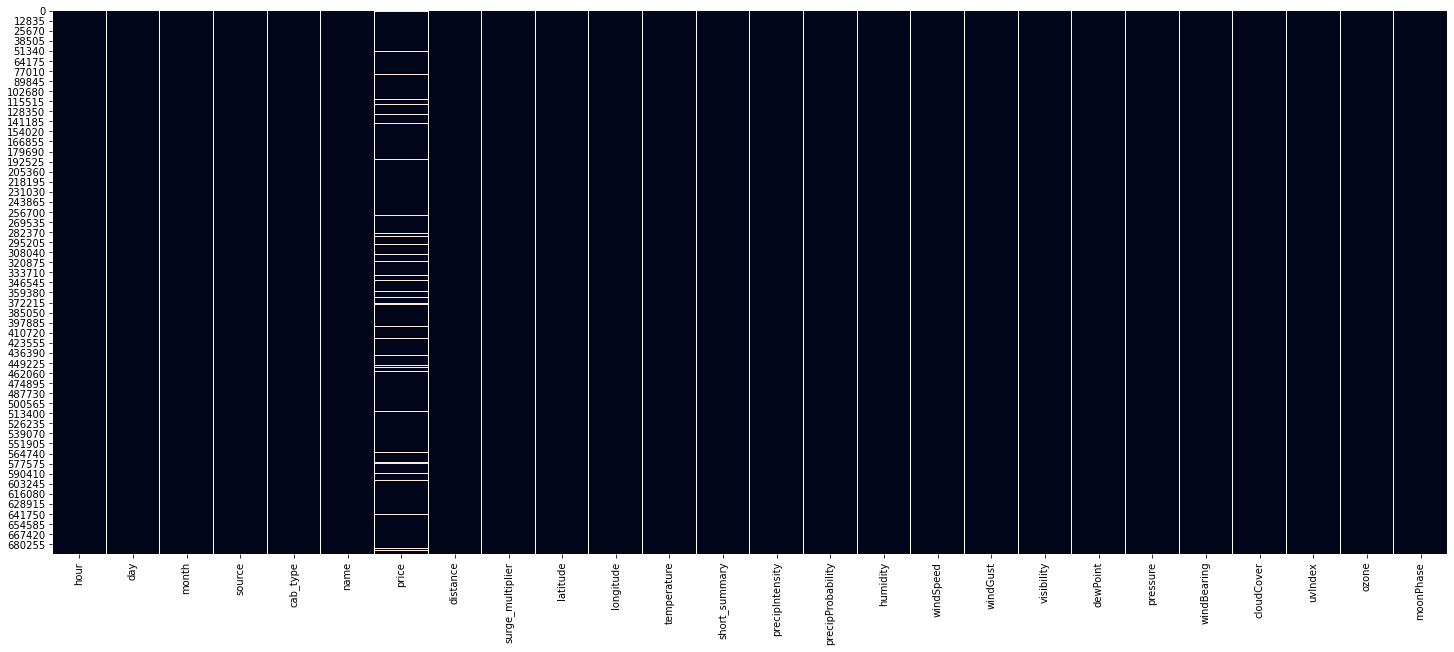

In [53]:
plt.figure(figsize=(25, 10))

sns.heatmap(df.isnull(), cbar=False)

plt.show()

In [54]:
df=df[df['price'].isnull()==False]

In [55]:
df.isnull().sum()

hour                 0
day                  0
month                0
source               0
cab_type             0
name                 0
price                0
distance             0
surge_multiplier     0
latitude             0
longitude            0
temperature          0
short_summary        0
precipIntensity      0
precipProbability    0
humidity             0
windSpeed            0
windGust             0
visibility           0
dewPoint             0
pressure             0
windBearing          0
cloudCover           0
uvIndex              0
ozone                0
moonPhase            0
dtype: int64

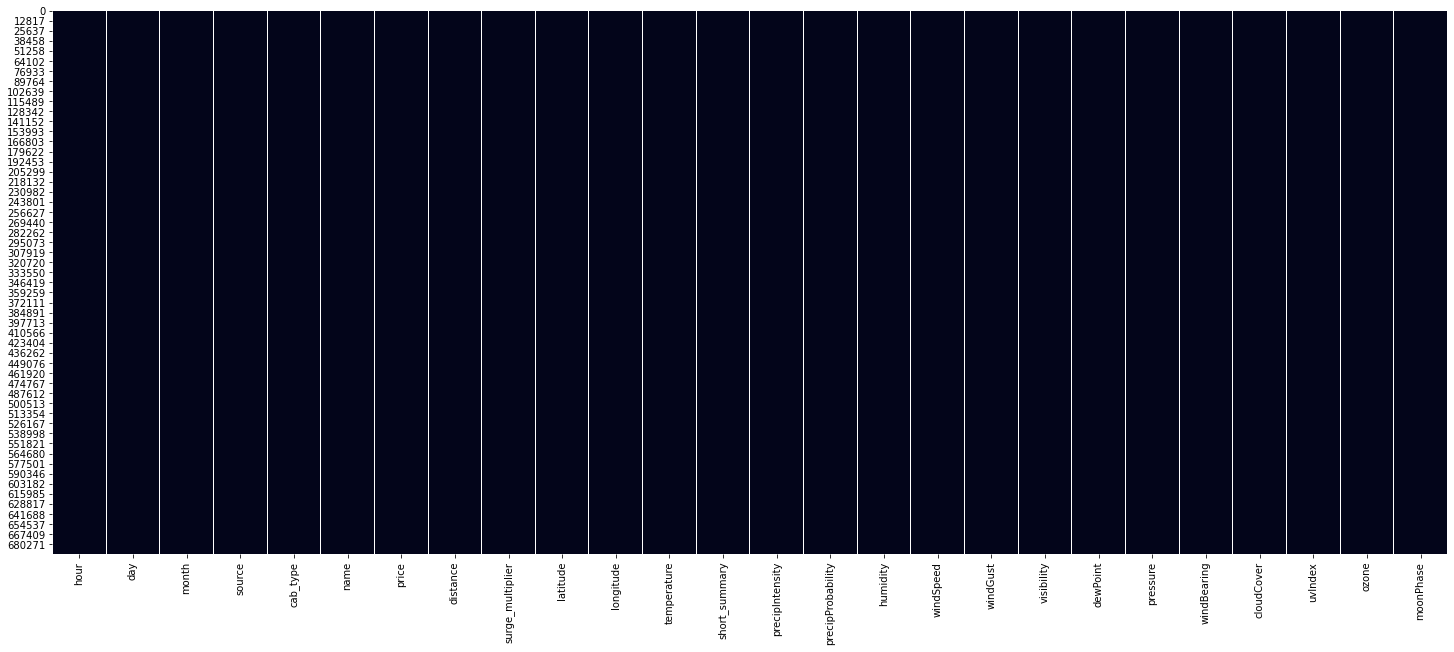

In [56]:
plt.figure(figsize=(25, 10))

sns.heatmap(df.isnull(), cbar=False)

plt.show()

In [57]:
df.shape

(637976, 26)

In [58]:
num_col=df.select_dtypes(include='number')

In [59]:
num_col.shape

(637976, 22)

In [60]:
cat_col=df.select_dtypes(include='object')

In [61]:
cat_col.shape

(637976, 4)

In [62]:
cat_col.head()

source cab_type          name    short_summary
0  Haymarket Square     Lyft        Shared   Mostly Cloudy 
1  Haymarket Square     Lyft           Lux            Rain 
2  Haymarket Square     Lyft          Lyft           Clear 
3  Haymarket Square     Lyft  Lux Black XL           Clear 
4  Haymarket Square     Lyft       Lyft XL   Partly Cloudy

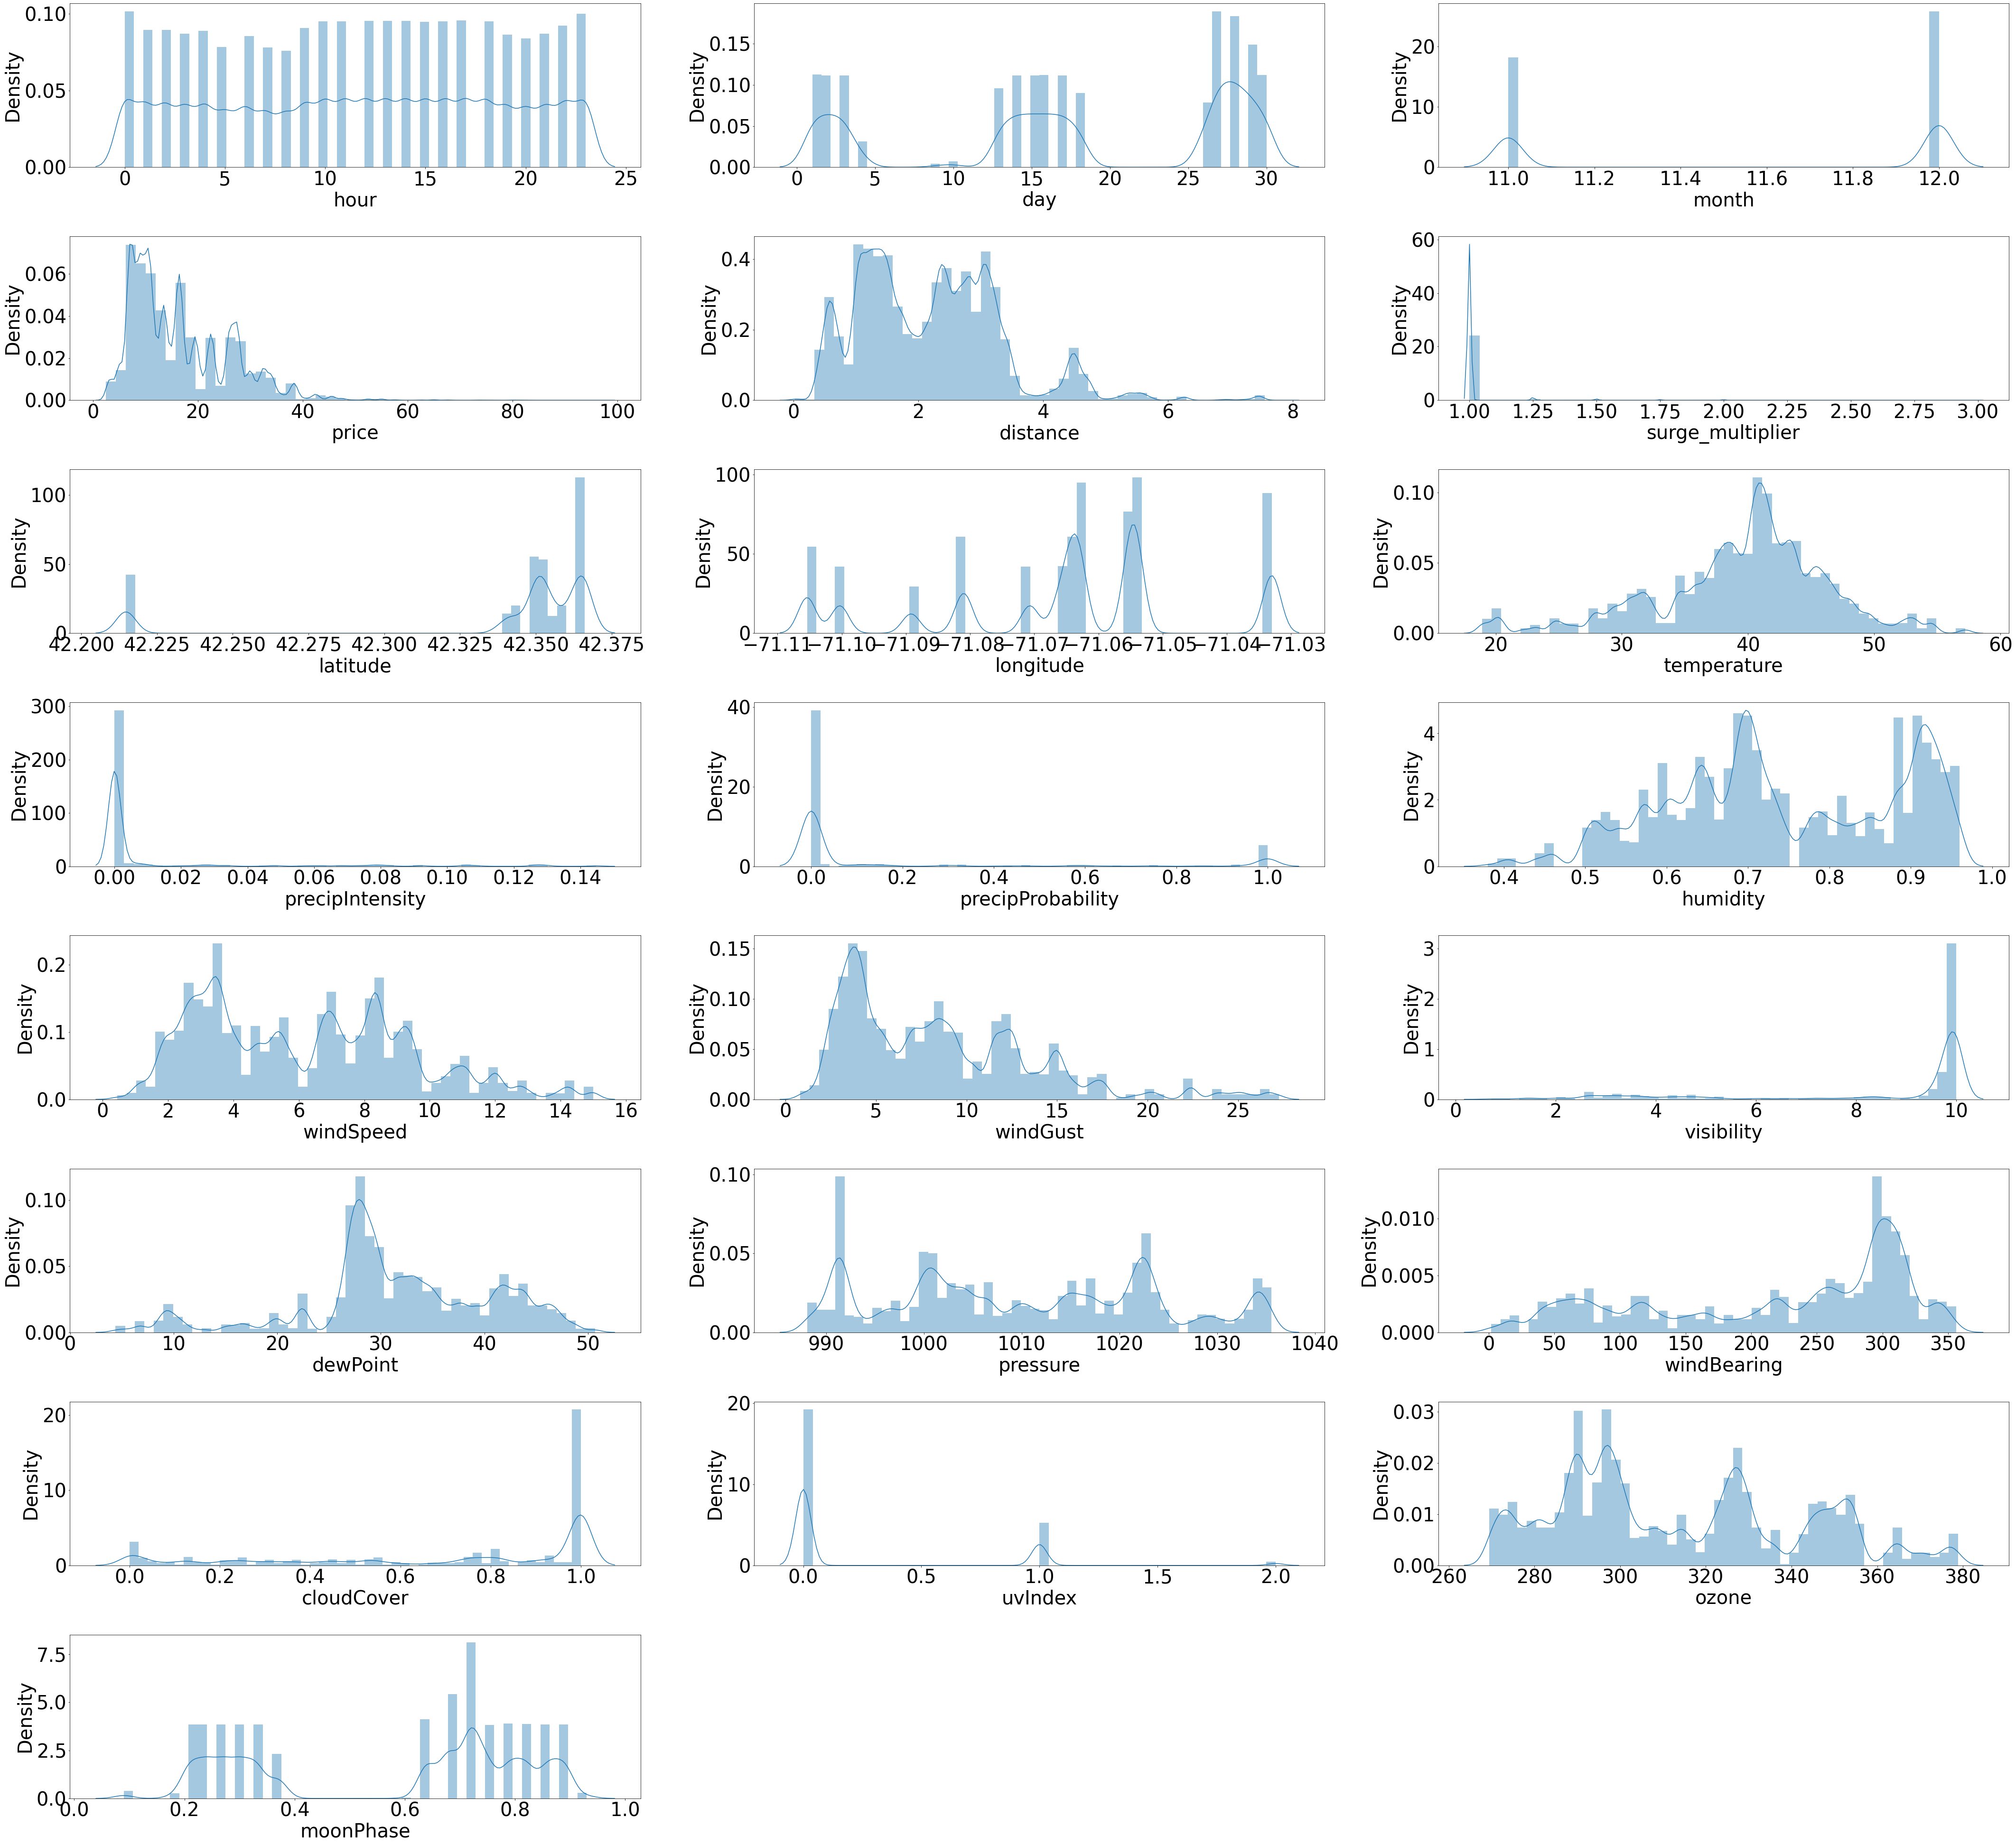

In [63]:
plt.figure(figsize=(60,55))
plt.rcParams.update({'font.size': 40})
j=1
for column in num_col:
    plt.subplot(8,3,j)
    sns.distplot(num_col[column])
    plt.tight_layout()
    j=j+1

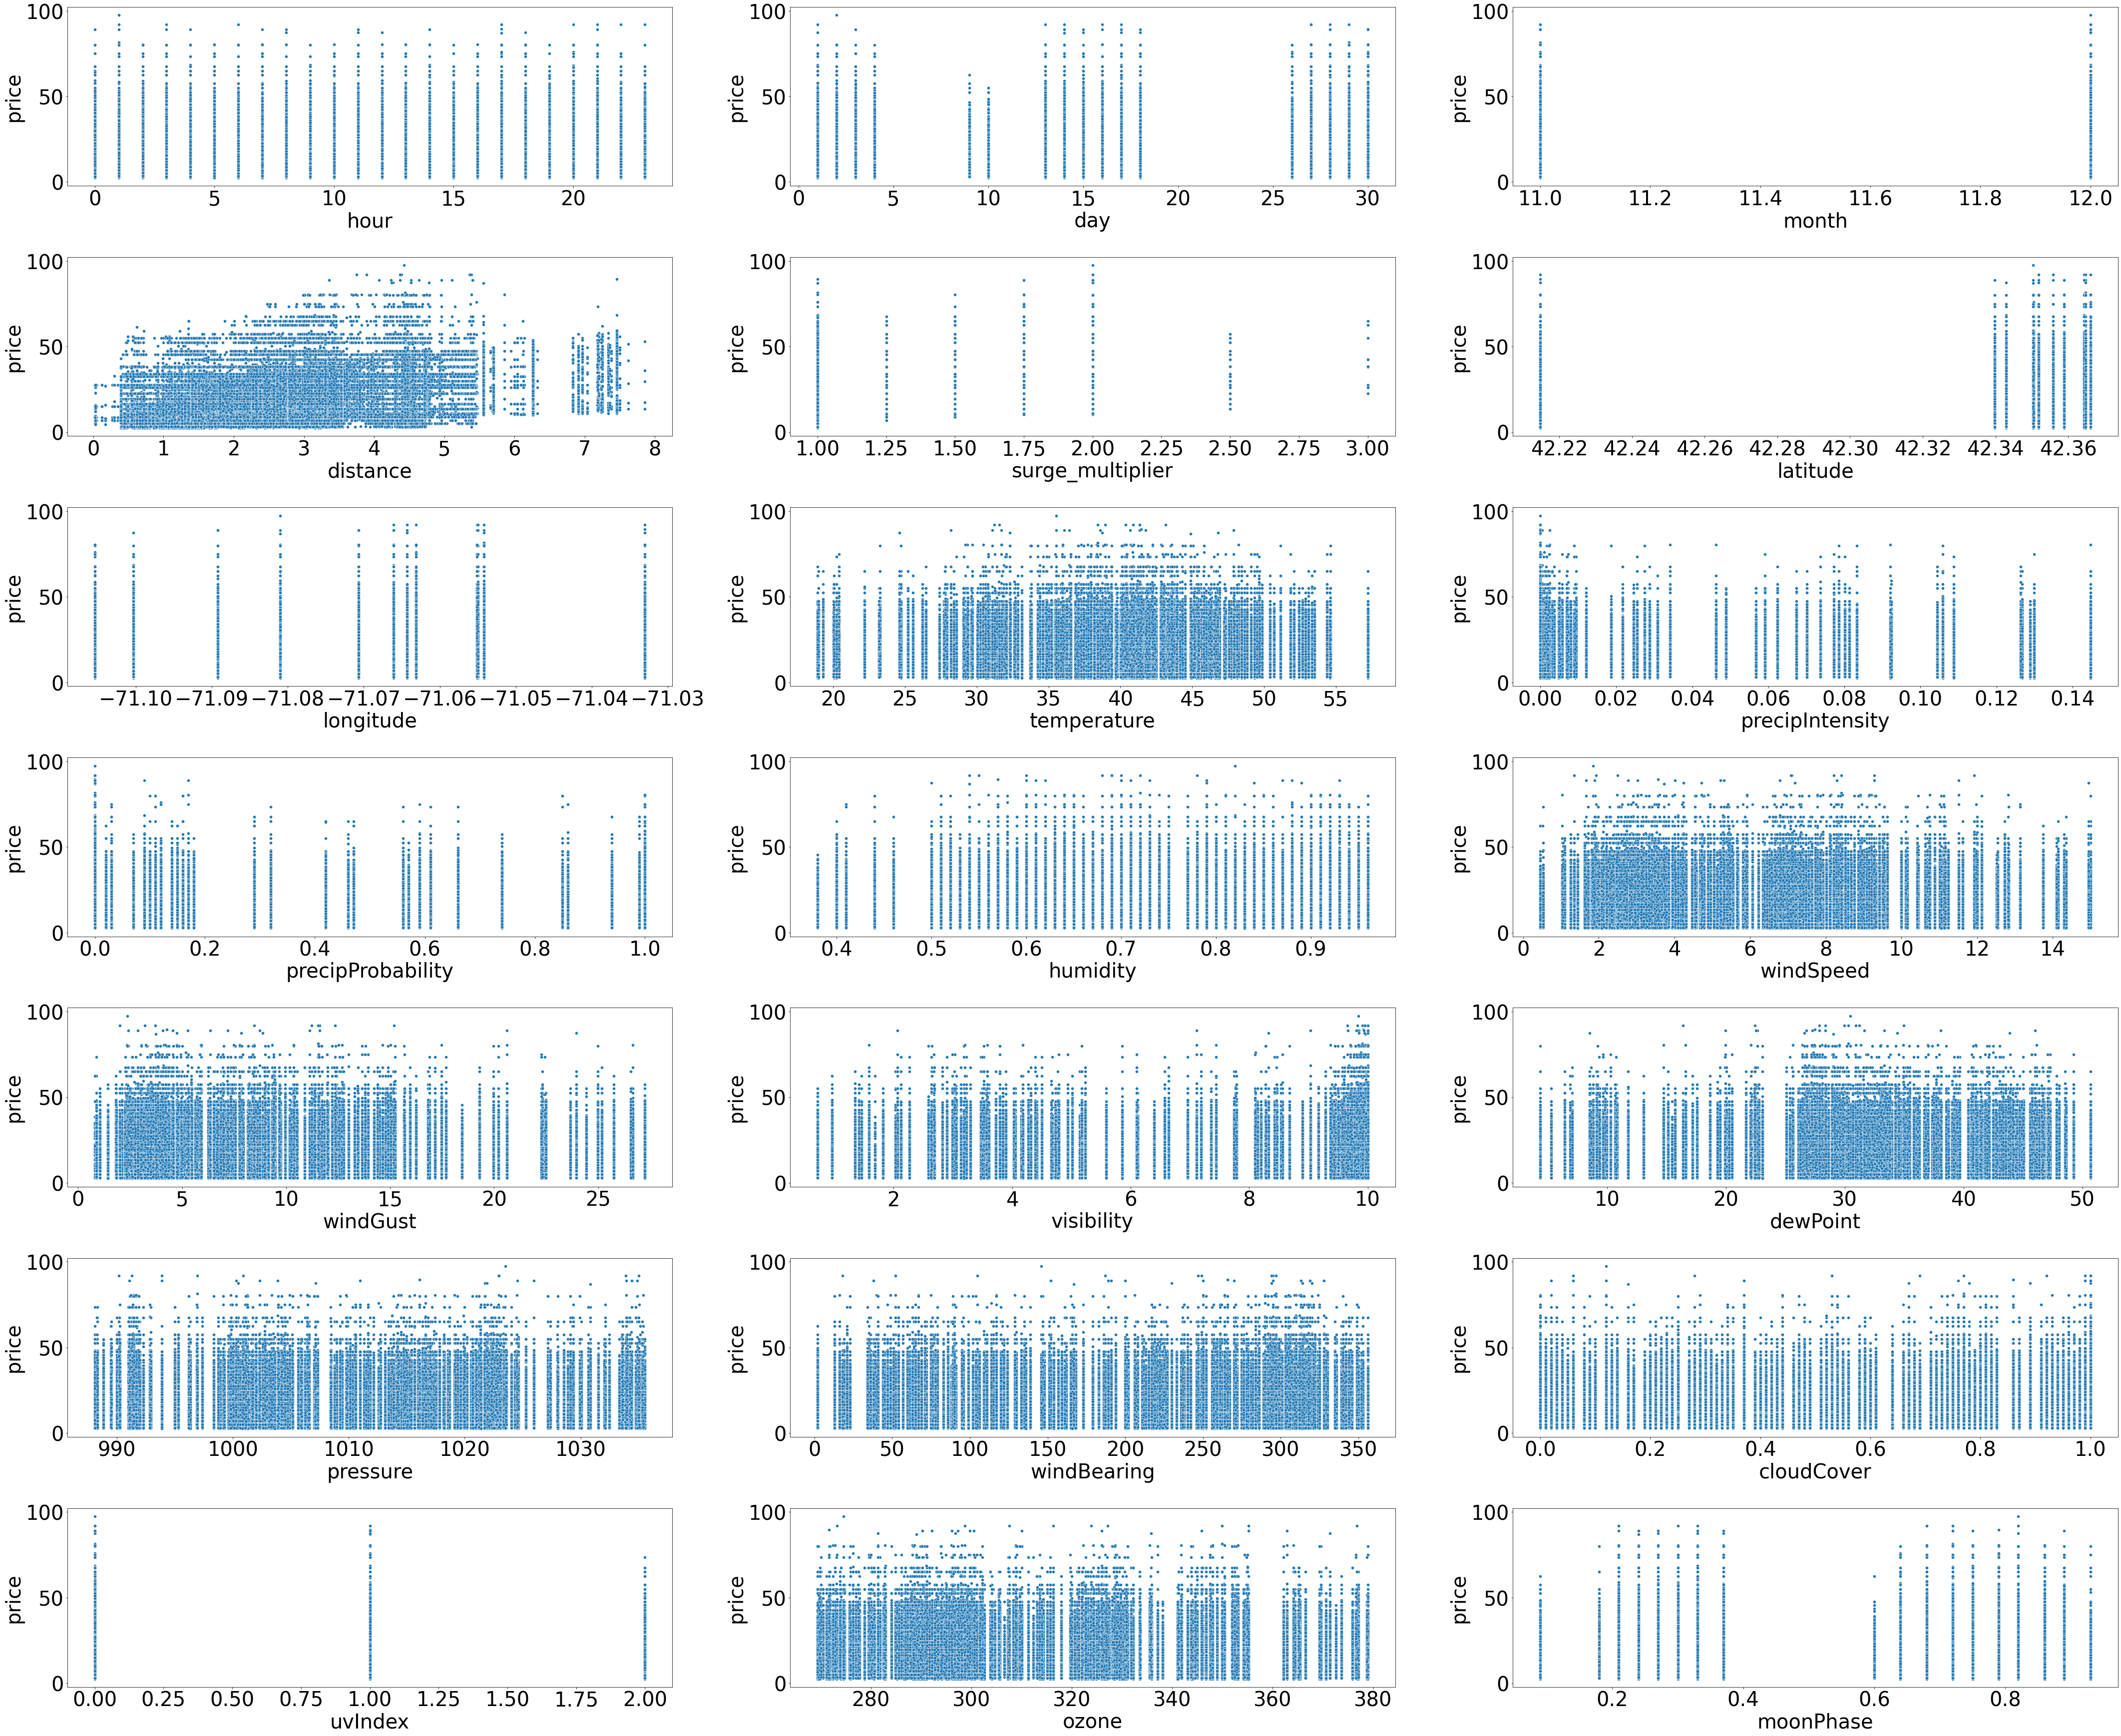

In [64]:
plt.figure(figsize=(60,55))
plt.rcParams.update({'font.size': 40})
j=1
for column in num_col:
    if column=='price':
        continue
    else:
        plt.subplot(8,3,j)
        sns.scatterplot(x=num_col[column],y=num_col['price'])
        plt.tight_layout()
        j=j+1

In [65]:
cat_col1=cat_col.copy()

In [66]:
cat_col['price']=df['price']

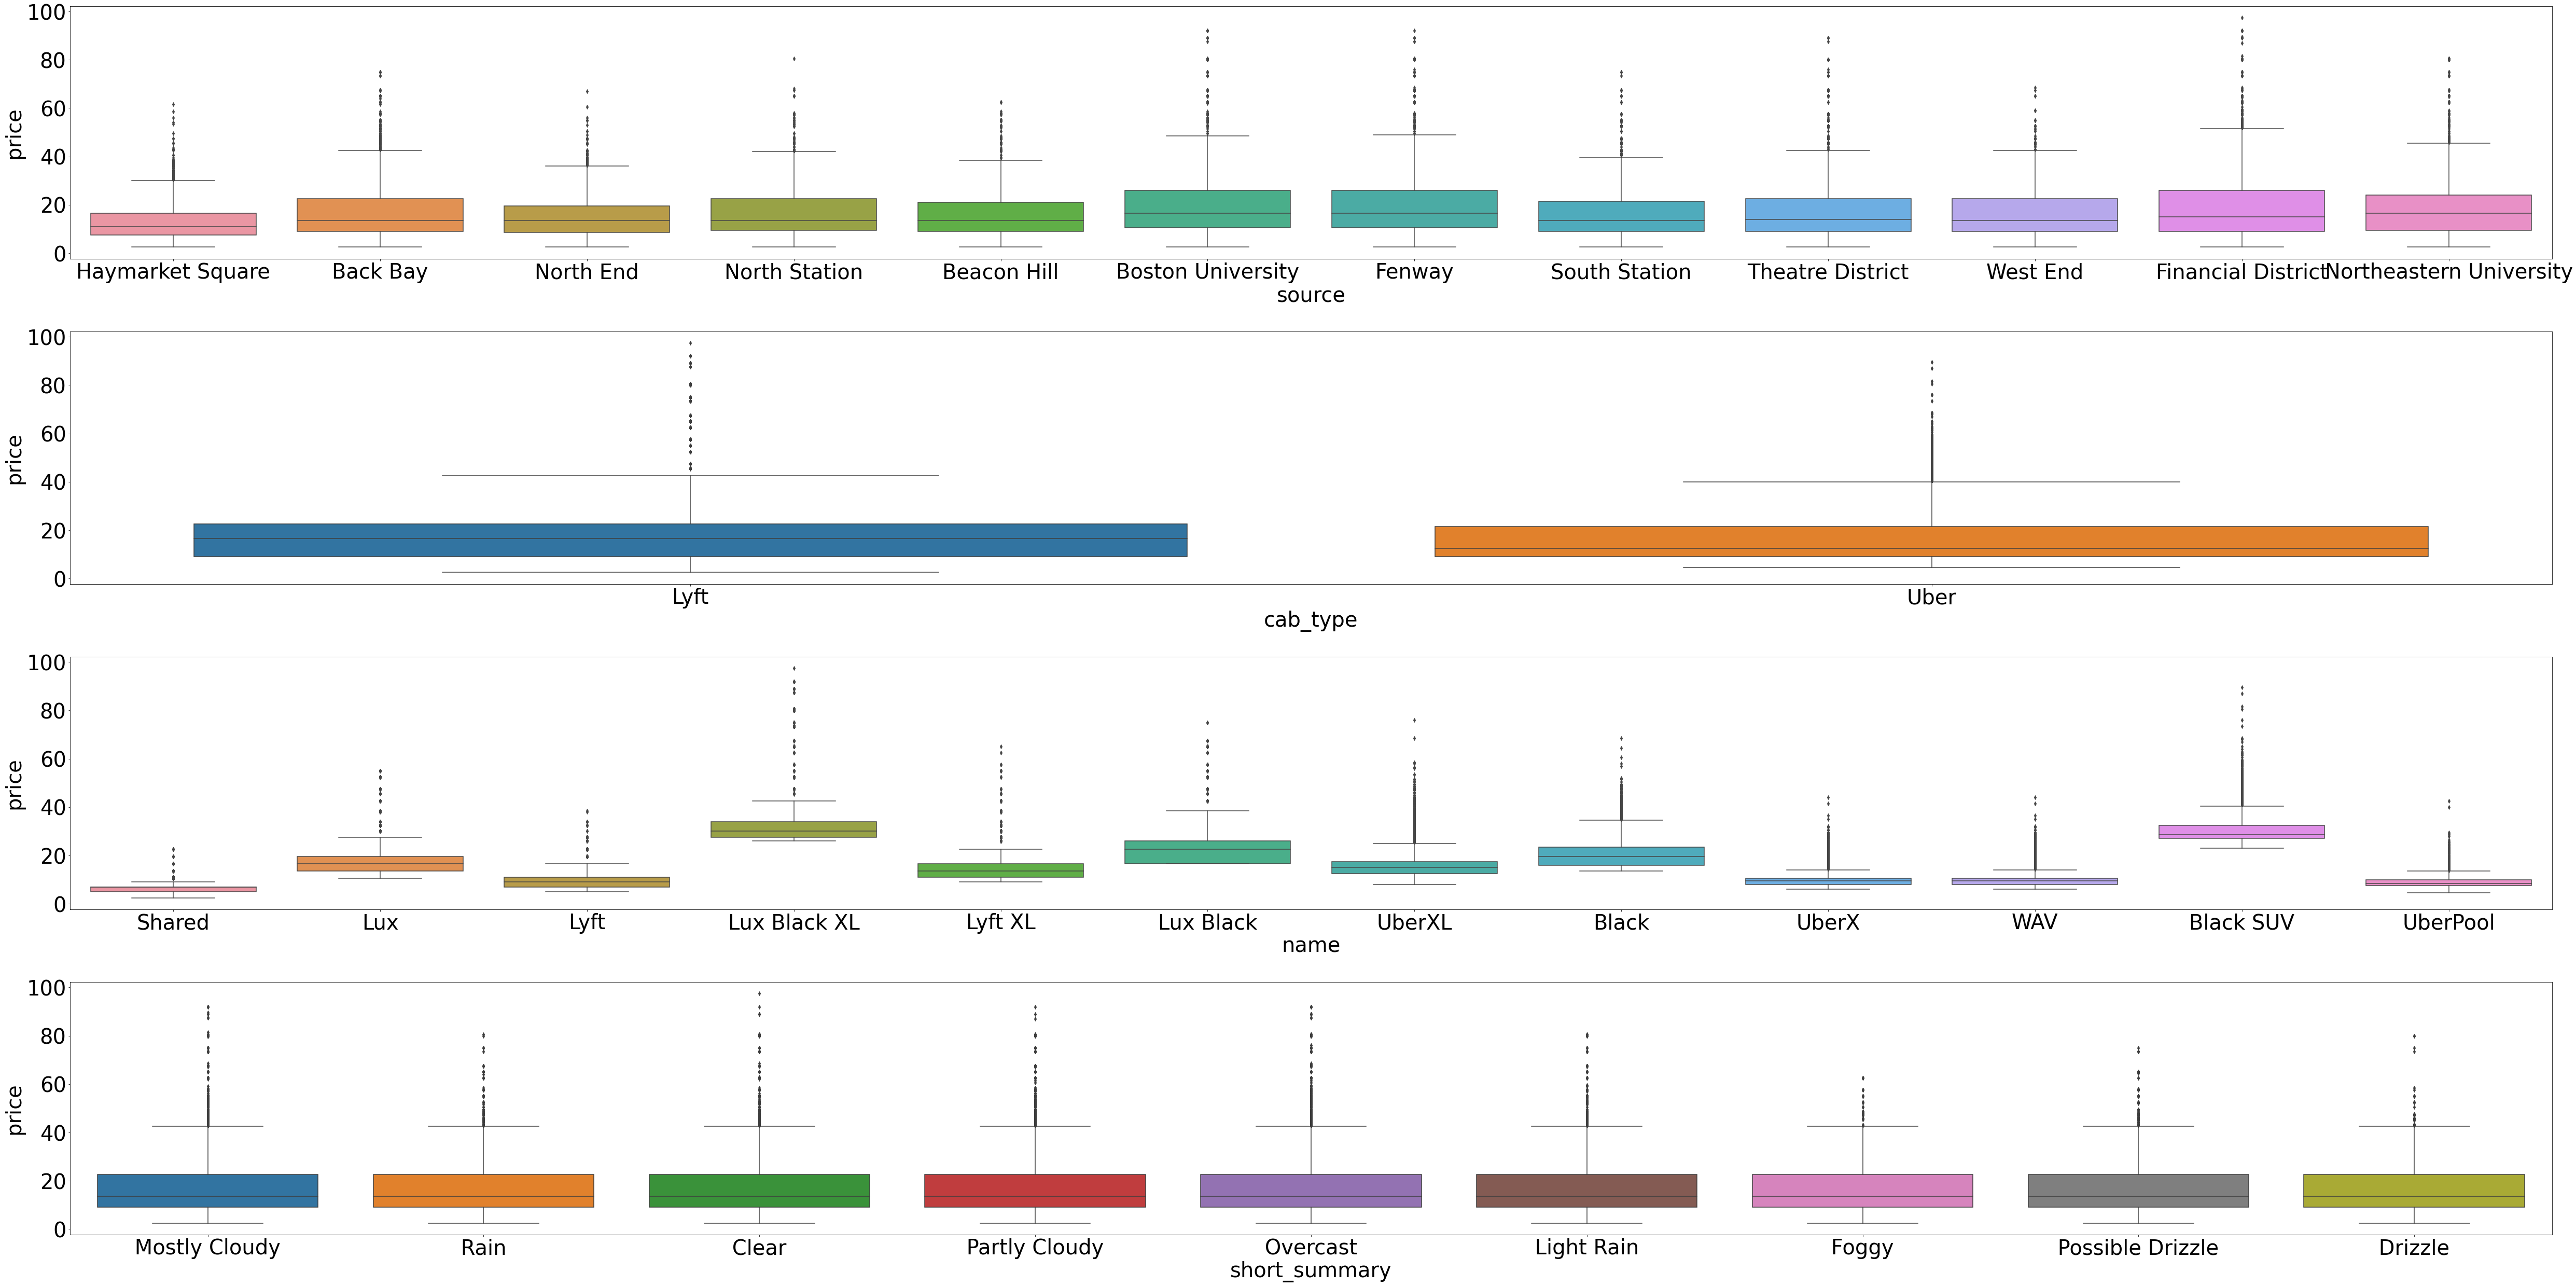

In [67]:
plt.figure(figsize=(70,69))
plt.rcParams.update({'font.size': 40})
j=1
for column in cat_col:
    if column=='price':
        continue
    else:
        plt.subplot(8,1,j)
        sns.boxplot(x=cat_col[column],y=cat_col['price'])
        plt.tight_layout()
        j=j+1

In [68]:
corr=num_col.corr()

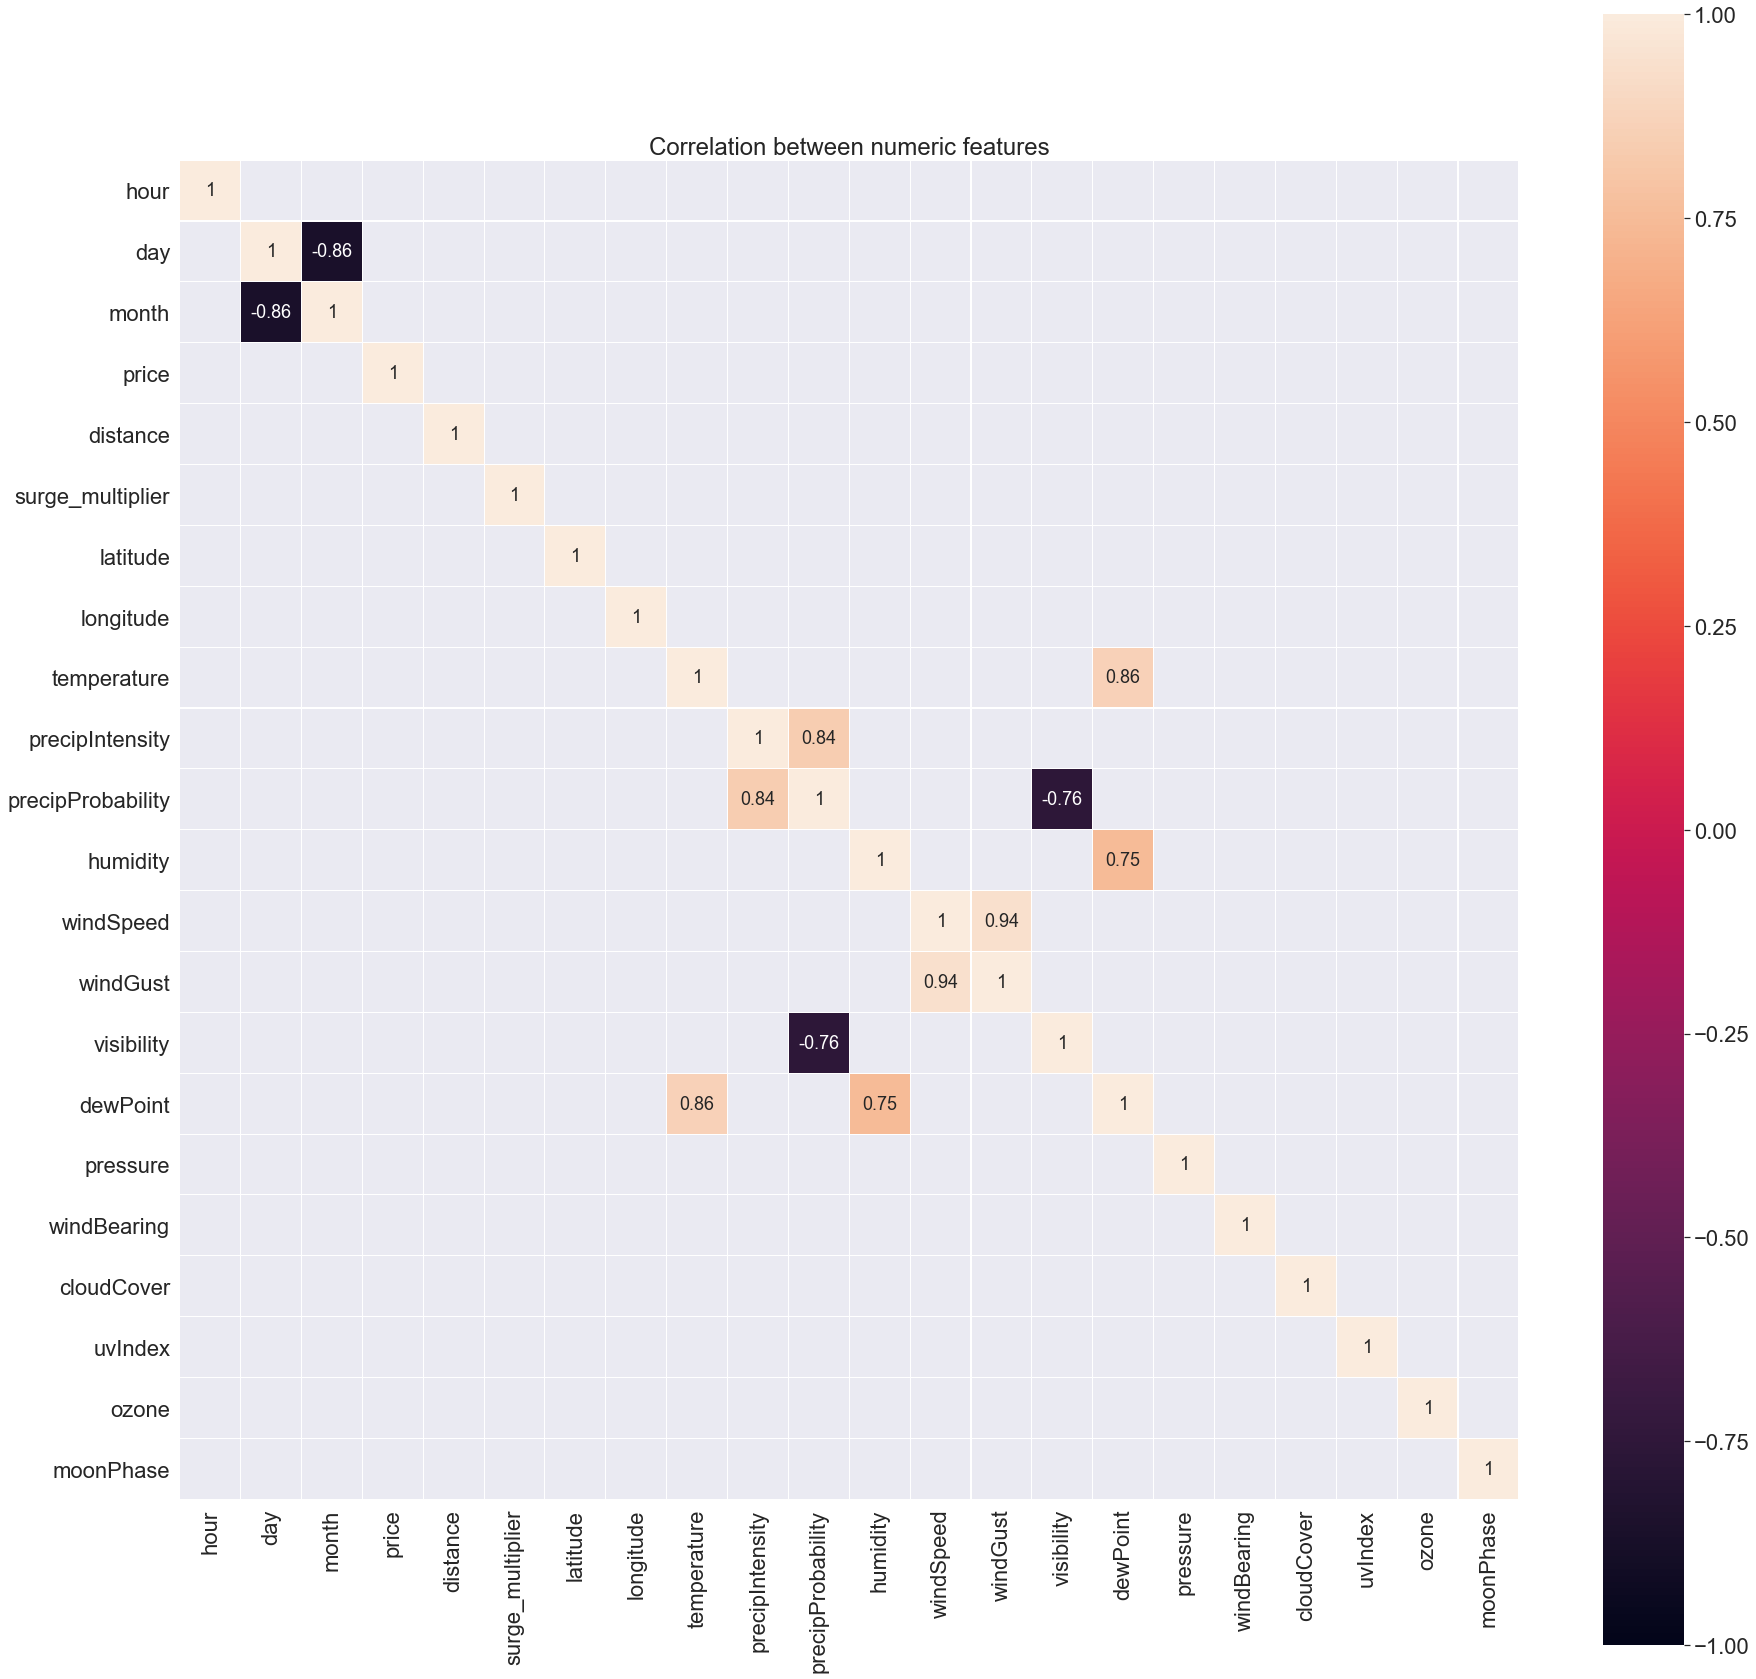

In [69]:
# set figure size
plt.figure(figsize=(30, 30))

# set condition to get a strong correlation between the variables
sns.set(font_scale=2)
sns.heatmap(corr[(corr >= 0.7) | (corr <= -0.7)],
            vmax=1.0, vmin=-1.0, linewidths=0.1,
           annot=True, annot_kws={"size": 18}, square=True);

# specify name of the plot
plt.title('Correlation between numeric features')
plt.show()